In [8]:
import pandas as pd
import xarray as xr
# from rpt_rdr import rpt_trop,jenk_trop, BottumUp_trop, Binseg_trop
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import ruptures as rpt
from matplotlib.lines import Line2D

In [9]:
#FINDING THE TROPOPAUSE HEIGHTS WITH CHANGE POINT DETECTION USING RUPTURES 

import xarray as xr
import ruptures as rpt
import numpy as np
import jenkspy
#%%
# def rpt_blh(rs, bp,jp):
#     model = rpt.Dynp(model="l1", jump=jp)

#     B = []
#     for i in range(len(rs.time)):
#         r=rs.isel(time=i, )
#         if np.isnan(r.values).all()==True:
#             print ('no values')
#             breaks = np.nan
#             w = xr.Dataset(data_vars={"blh" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         else:
#             breaks = model.fit_predict(r.values, bp)
#             w = xr.Dataset(data_vars={"blh" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))},
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         B.append(w)
#     y=xr.concat(B, dim= 'time')
#     return y
# #%%

# def rpt_trop(rs,bp, jp):
#     B = []

#     model = rpt.Dynp(model="l1", jump=jp)

#     for i in range(len(rs.time)):
#         r=rs.isel(time=i, )
#         if np.isnan(r.values).all()==True:
#             print ('no values')
#             breaks = np.nan
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         else:
#             breaks = model.fit_predict(r.values,bp)
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
        
#         B.append(x)
#     y=xr.concat(B, dim= 'time')
#     return y

#%%
def jenk_trop(rs,bp):
    B = []

    for i in range(len(rs.time)):
        
        r=rs.isel(time=i, )
        # print (r.time)
        if np.isnan(r.values).all()==True:
            # print ('no values')
            breaks = np.nan
            x = xr.Dataset(data_vars={"trop_h" : (["jenkspy"],[np.nan]*(bp+1) )}, 
                           coords={'jenkspy':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
        else:
            breaks = jenkspy.jenks_breaks(r.values, n_classes=bp)# model.fit_predict(r.values,bp)
            x = xr.Dataset(data_vars={"trop_h" : (["jenkspy"],
                                                  [float((r.where(r == j, drop=True).level.values)[0]) for j in breaks])}, 
                           coords={'jenkspy':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
        
        B.append(x)
    y=xr.concat(B, dim= 'time')
    return y

#%%
# def BottumUp_trop(rs,bp,jp):
#     B=[]
    
#     for i in range(len(rs.time)):
#         r=rs.isel(time=i, )
#         if np.isnan(r.values).all()==True:
#             print ('no values')
#             breaks = np.nan
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                             coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         else:
#             bottumup = rpt.BottomUp(model='l1', jump =jp).fit(r.values)
#             breaks = bottumup.predict(n_bkps=bp)#,pen=15)
    
#     #         breaks = pelt.fit_predict(r.values, 30)
#     #         print (breaks)
#     #         print (r.level.isel(level=[j-1 for j in breaks]))
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                             coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         B.append(x)
#     y=xr.concat(B, dim='time')
#     return y

# #%%
# def Binseg_trop(rs,bp,jp):
#     B=[]
    
#     for i in range(len(rs.time)):
#         r=rs.isel(time=i, )
#         if np.isnan(r.values).all()==True:
#             print ('no values')
#             breaks = np.nan
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                             coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         else:
#             pelt = rpt.Binseg(model='l1', jump =jp).fit(r.values)
#             breaks = pelt.predict(n_bkps=bp)#,pen=15)
    
#     #         breaks = pelt.fit_predict(r.values, 30)
#     #         print (breaks)
#     #         print (r.level.isel(level=[j-1 for j in breaks]))
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                             coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         B.append(x)
#     y=xr.concat(B, dim='time')
#     return y

In [10]:
tp_h= pd.read_csv('/media/sps/My Passport/change_point detection/rdr_jenkspy_bpnt17-21', sep=',', )
tph = [pd.to_datetime(i, format = "%Y-%m-%d %H:%M:%S") for i in tp_h.iloc[:,0]]

lt = pd.read_csv('/media/sps/My Passport/change_point detection/rdr_rds_t', header=None)
Lt = [pd.to_datetime(i, format = "%Y-%m-%d %H:%M:%S") for i in lt.iloc[:,0]]
# Lt=lt.apply(lambda x:pd.to_datetime(x, format = "%Y-%m-%d %H:%M:%S"),axis=1)
#
res = [min(tph[:], key=lambda sub: abs(sub - Lt[j])) for j in range(len(Lt))]
# len(res)



In [11]:
cpt_radiosonde= pd.read_csv('/media/sps/My Passport/cpt', sep=',', )
print(cpt_radiosonde)
cpt_radiosonde1=cpt_radiosonde.iloc[:,2]
cpt_time=cpt_radiosonde.iloc[:,0]
print(cpt_time)

                 RD_time    RPT      CPT     3
0    2017-05-15 15:30:00  17.19  16632.8  4343
1    2017-05-16 15:30:00  17.19  16711.6  4250
2    2017-05-29 15:30:00  16.29  17731.3  4553
3    2017-05-31 15:30:00  16.11  16851.5  3936
4    2017-06-03 15:30:00  16.65  17259.4  4730
..                   ...    ...      ...   ...
207  2021-09-09 15:30:00  16.11  16098.2  3397
208  2021-09-11 16:00:00  16.29  16652.9  3028
209  2021-09-13 16:00:00  16.83  16381.0  3270
210  2021-09-16 15:30:00  17.19  16965.7  3412
211  2021-09-18 15:30:00  16.11  15746.6  3283

[212 rows x 4 columns]
0      2017-05-15 15:30:00
1      2017-05-16 15:30:00
2      2017-05-29 15:30:00
3      2017-05-31 15:30:00
4      2017-06-03 15:30:00
              ...         
207    2021-09-09 15:30:00
208    2021-09-11 16:00:00
209    2021-09-13 16:00:00
210    2021-09-16 15:30:00
211    2021-09-18 15:30:00
Name: RD_time, Length: 212, dtype: object


In [5]:
# tp_h.style.applymap(func=lambda x: 'color: red' if x==res[0] else None , subset=['RD_time'])
# import re
# pat = re.compile(r'\b(' + '|'.join(map(str, res)) + r')\b')
# def myFmt(txt):
#     return pat.sub(r'<font color="#ff0000">\1</font>', repr(txt))
# tp = tp_h.style.format(myFmt)
# tp

In [30]:
# print(cpt_radiosonde)
# cpt_radiosonde1=cpt_radiosonde[:]
# cpt_radiosonde1

0      16632.8
1      16711.6
2      17731.3
3      16851.5
4      17259.4
        ...   
207    16098.2
208    16652.9
209    16381.0
210    16965.7
211    15746.6
Name: CPT, Length: 212, dtype: float64


In [12]:
laun=pd.read_csv('/media/sps/My Passport/change_point detection/rds_lau.txt', header=None,)#sep=' ')
rds2 = pd.read_csv('/media/sps/My Passport/change_point detection/file1', header=None)

ts = [pd.to_datetime(i[-13:-4], format ='%d%b%Y').date() for i in rds2.iloc[:,0]]
launt = [pd.to_datetime(i[:10], format ='%Y-%m-%d').date() for i in laun.iloc[:,0]]
tss=sorted([*set(ts)])     

b = xr.open_dataset('/media/sps/My Passport/change_point detection/SNR_[14-18]_2017-21.nc')
y = pd.to_datetime(b.time.values)
te = sorted([*set([i.date() for i in y])])
tru = [i for i in te if len(b.time.sel(time=str(i)))>30 ]

k_rs=sorted(list(set(tss).intersection(tru, launt))) 


b = xr.open_dataset('/media/sps/My Passport/change_point detection/SNR_[14-18]_2017-21.nc')
# rs = b.SNR.sel(beams= 1, level=slice(15.5, 18.5), time = str(k_rs[0])).resample(time='15Min').mean()

In [29]:
# f,ax=plt.subplots(figsize=(12,9))
# b.SNR.sel(beams= 1, time = '2020-08-14T', level=slice(12,18), ).resample(time='1H').mean('time').plot.pcolormesh(y='level',cmap='jet', ax=ax,
#                                                                                 vmin=-15, vmax=35)#

In [30]:
# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(k_rs[5]))

# # algo = rpt.Window(width=40, model=model).fit(signal)
# # my_bkps = algo.predict(n_bkps=3)

# pelt = rpt.Window(width=5, model='l2', ).fit(rs.isel(time=1).values)
# bkps = pelt.predict(n_bkps=2)#, pen=3)
# f, ax=plt.subplots(figsize=(12,2))
# ax.plot(rs.isel(time=1).values)
# rpt.display(rs.isel(time=1).values, bkps)
# ax.vlines(x=np.array(bkps)-1, ymin=-20, ymax=30)
# # bkps,rs.isel(time=1).values, rs.isel(time=1).values[bkps[3]-1]
# # np.array(bkps)-1
# # bkps
# bkps

In [21]:
tim=['2017-06-12T15', '2017-06-23T15','2020-08-14T16','2021-08-04T16','2021-09-09T15',]
tm = ['2017-06-12 15:00:00','2017-06-23 15:00:00','2020-08-14 16:00:00','2021-08-04 16:00:00','2021-09-09 15:00:00']
# b = xr.open_dataset('/home/ahana/Documents/radar/SNR_[14-18]_2017-21.nc')
jen=pd.read_csv('/media/sps/My Passport/change_point detection/rdr_jenkspy_1_Hour_bpnt17-21', sep=',')
rsn=['/media/sps/My Passport/change_point detection/2017/June_2017/12June2017/rts12Jun2017.txt',
     '/media/sps/My Passport/change_point detection/2017/June_2017/23June2017/rts23Jun2017.txt',
     '/media/sps/My Passport/change_point detection/2020/August_2020/14_Aug_2020/rts14Aug2020.txt',
      '/media/sps/My Passport/change_point detection/2021/08_August_2021/04_Aug_2021/rts04Aug2021.txt',
     '/media/sps/My Passport/change_point detection/2021/09_September_2021/09_Sep_2021/rts09Sep2021.txt',]
rd_s = pd.read_csv(rsn[0], sep='\t',
                      encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
h=jen[jen.iloc[:,0]==tm[4]]
rd_s

,Time [sec],P [mbar],T [°C],U [%],Geo Pot [m],Dew [°C],RI,GRI,MRI,CL [m/s],...,Spec U [g/kg],UTC Time [sec],Wsp [m/s],Azimut [?],N/S Wind [m/s],E/W Wind [m/s],Vert Wind [m/s],Lon [°],Lat [°],Altitude [m]
0,0.0,1002.0,29.8,66,35,22.8,259.3,NaN,259.3,349.1,...,17.35,31202.0,0.0,0.0,NaN,NaN,NaN,76.33203,10.04227,35.0
1,1.0,1001.6,29.5,68,39,22.9,259.6,NaN,260.2,348.9,...,17.56,31203.0,0.5,291.0,NaN,NaN,NaN,76.33209,10.04226,39.0
2,2.0,1001.1,29.2,70,43,23.1,259.8,NaN,261.0,348.8,...,17.75,31204.0,1.1,291.0,NaN,NaN,NaN,76.33216,10.04225,43.0
3,3.0,1000.7,28.9,72,47,23.3,260.0,NaN,261.9,348.6,...,17.93,31205.0,1.6,291.0,NaN,NaN,NaN,76.33222,10.04224,47.0
4,4.0,1000.2,28.6,74,51,23.4,260.2,NaN,262.8,348.4,...,18.09,31206.0,2.1,291.0,NaN,NaN,NaN,76.33228,10.04223,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,7831.0,7.4,-35.7,1,33340,-69.9,2.5,NaN,5272.1,309.1,...,0.31,39033.0,NaN,NaN,NaN,NaN,NaN,75.53057,9.88638,33599.6
7832,7832.0,7.4,-35.6,1,33344,-69.8,2.5,NaN,5272.9,309.1,...,0.31,39034.0,NaN,NaN,NaN,NaN,NaN,75.53028,9.88641,33604.1
7833,7833.0,7.4,-35.5,1,33349,-69.8,2.5,NaN,5273.6,309.2,...,0.31,39035.0,NaN,NaN,NaN,NaN,NaN,75.52998,9.88643,33608.5
7834,7834.0,7.4,-35.5,1,33353,-69.8,2.5,NaN,5274.3,309.2,...,0.31,39036.0,NaN,NaN,NaN,NaN,NaN,75.52968,9.88646,33613.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Series([], Name: Altitude [m], dtype: float64)
no downdraft
2017-06-12 15:00:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Series([], Name: Altitude [m], dtype: float64)
no downdraft
2017-06-23 15:00:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2020-08-14 16:00:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2021-08-04 16:00:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2021-09-09 15:00:00


15.93

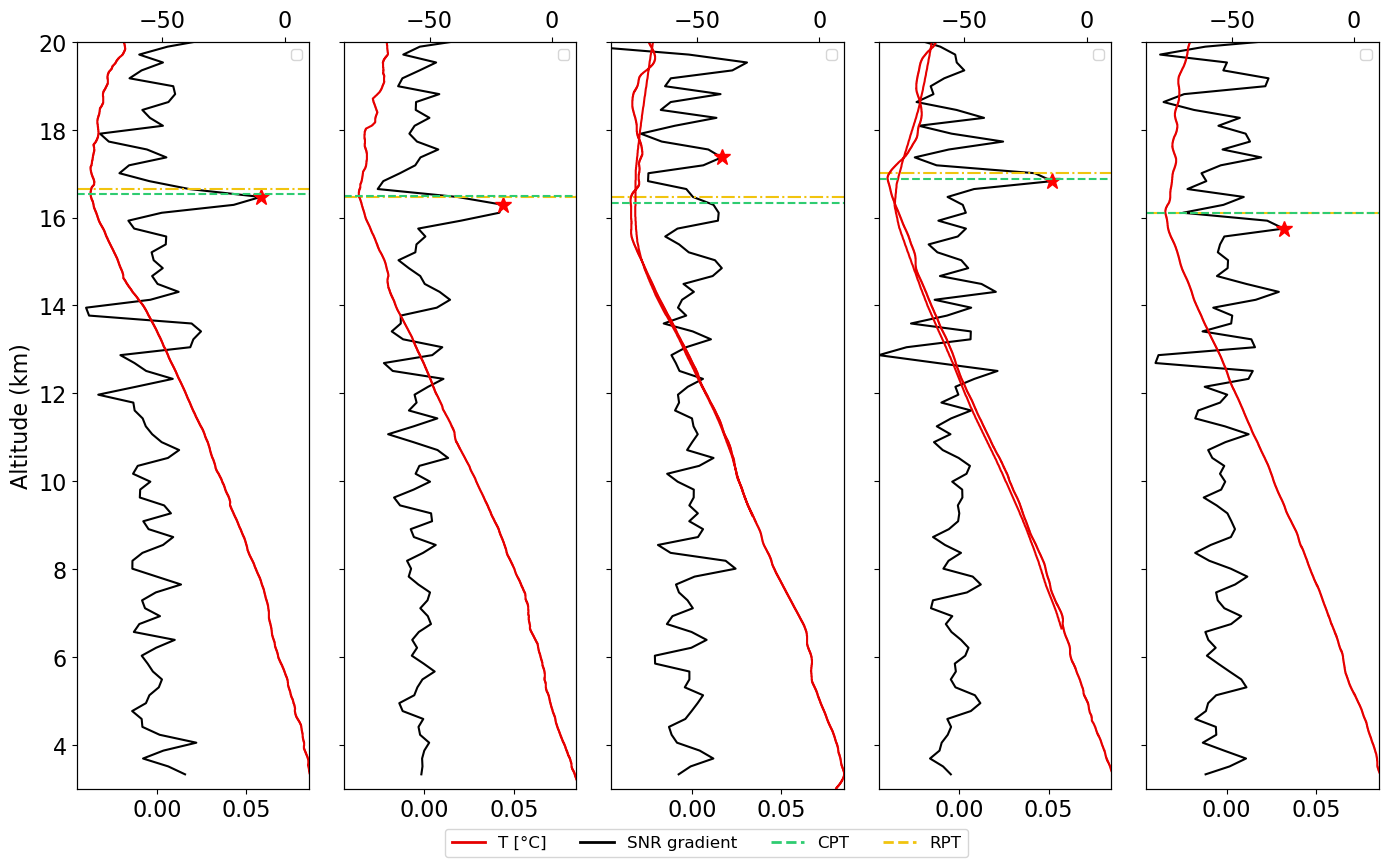

In [49]:

import pandas as pd
import xarray as xr
# from rpt_rdr import rpt_trop,jenk_trop, BottumUp_trop, Binseg_trop
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import ruptures as rpt
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

f = plt.figure(figsize=(14,9))
for i in range(5):
    ax = f.add_subplot(1,5,i+1 )
    ax.tick_params(axis='both', which='major', labelsize=16)
    RD = b.SNR.sel(beams= 1, time=tim[i]).resample(time='1H').mean('time')
    sg =np.gradient(RD.sel(time=tim[i]))/np.gradient(RD.level.values*1000)
    np.argmax(sg[49:82])
    rd_s = pd.read_csv(rsn[i], sep='\t',
                      encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
    rds= rd_s[rd_s.iloc[:,23]>=3000]
    dif=rds.iloc[:,23].diff()
#     if (dif<0).any():
#         print ('true')
#     if len(dif[dif<0])==0:
#         rds=rds
#         print (dif[dif<0])
#         print ('no downdraft')
#     else:
#         rds=rds[:dif[dif<0].index[0]]
    if len(dif[dif<0])==0:
        rds=rds
        print (dif[dif<0])
        print ('no downdraft')
    else:
        rds=rds[:dif[dif<0].index[0]]
    h=RD.level.values
    h_s = h[67:82][np.argmax(sg[67:82])]
    ax.plot(sg,h, c='k', label='SNR gradient')##0000e6
#     ax.set_title(tm[i][:10], fontsize=16)
#     ax.plot(RD.sel(time=tim[i]),h, c='#0000e6', label='SNR gradient')
    ax.plot(np.max(sg[67:82]),h_s, c='r', marker='*', markersize =12, label = tm[i][:10])
    ax.set(ylim=(3,20), xlim = (-0.045,0.085))#yticks=h[::15], yticklabels= h[::15]/1000)
    if i==0:
        ax.set_ylabel('Altitude (km)', fontsize=16)
    ax1=ax.twiny()
    ax.axhline(jen[jen.iloc[:,0]==tm[i]].iloc[0,1], c='#f1c40f', linestyle='-.', label='RPT')#f1c40f
#     ax.plot(jen[jen.iloc[:,0]==tm[i]].iloc[0,1],jen[jen.iloc[:,0]==tm[i]].iloc[0,1], c='#f1c40f', linestyle='-.', label='RPT')

#     ax.set_title(str(k[i]))
    ax1.plot(rds.iloc[ :,2],rds.iloc[ :,23]/1000,c='#e60000', linestyle ='-',)#e60000
    ax1.axhline(y=jen[jen.iloc[:,0]==tm[i]].iloc[0,2]/1000, c='#2ecc71', linestyle='--',)#2ecc71
    ax1.legend()

#     ax1.tick_params(axis='x', colors='#e60000')
    print(tm[i])
    ax1.set(ylim=(3,20), xlim=(-85,10),)# yticks=h[::15], yticklabels= h[::15]/1000)
    ax1.tick_params(axis='both', which='major', labelsize=16)    
    if i>0: 
        ax.set(yticklabels= [])
        ax1.set(yticklabels= [])
# # f.suptitle('16:15') 

c = ['#e60000', 'k', '#2ecc71', '#f1c40f']
l1 = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in c[:2]]
l2 = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in c[2:]]
lines=l1+l2
labels = [ 'T [°C]', 'SNR gradient', 'CPT', 'RPT']
f.legend(lines, labels, loc='center', fontsize =12, bbox_to_anchor=(0.5, 0.04), ncol=4)
f.subplots_adjust(left  = 0.05, right = .98, bottom = 0.1, top = 0.93, wspace = 0.15, )
f.savefig('CPT_rpt_act_T.jpg', dpi=500)
h[70]

In [9]:
# f = plt.figure(figsize=(14,9))
# for i in range(5):
#     ax = f.add_subplot(1,5,i+1 )
#     rd_s = pd.read_csv(rsn[i], sep='\t',
#                       encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
#     rds= rd_s[rd_s.iloc[:,23]>=3000]
#     dif=rds.iloc[:,23].diff()
# #     if (dif<0).any():
# #         print ('true')
# #     if len(dif[dif<0])==0:
# #         print (len(dif[dif<0]))
# #         rds=rds
# # #         print (dif[dif<0])
# # #         print ('no downdraft')
# #     else:
# #         print (len(dif[dif<0]))
# #         rds=rds[:dif[dif<0].index[0]]
# #         print (rds[:dif[dif<0].index[0]])
#     ax.plot(rds.iloc[:,2], rds.iloc[:,23])
#     ax.set(ylim=(3000,20000), )#xlim=(-85,10),)

In [10]:
# dif=rd_s.iloc[:,23].diff()

# dif[dif<0].index[0]
# rds=rds[:dif[dif<0].index[0]]
# plt.plot(rds.iloc[:,2], rds.iloc[:,23])
# dif[dif<0].index[0]
# rds.iloc[:6102,23].diff().any()

In [11]:
# B=[]
# bp=2
# from scipy.signal import savgol_filter

# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(k_rs[10]))
# rs_sm = savgol_filter(rs.values, 9, 2)
# for i in range(len(rs.time)):
#     r=rs.isel(time=i, )
#     if np.isnan(r.values).all()==True:
#         print ('no values')
#         breaks = np.nan
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     else:
#         pelt = rpt.BottomUp(model='l1', jump =5).fit(r.values)
#         breaks = pelt.predict(n_bkps=bp)#,pen=15)

# #         breaks = pelt.fit_predict(r.values, 30)
# #         print (breaks)
# #         print (r.level.isel(level=[j-1 for j in breaks]).values)
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     B.append(x)
# y=xr.concat(B, dim='time')
# rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# y.trop_h.sel(b_pnt=1).plot(c='k')
# y.trop_h.sel(b_pnt=2).plot(c='k')
# plt.title('Bottumup')
# breaks


In [12]:
# B=[]
# bp=2
# from scipy.signal import savgol_filter

# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(k_rs[10]))
# for i in range(len(rs.time)):
#     r1=rs.isel(time=i, )
#     r = savgol_filter(r1.values, 11, 2)
#     if np.isnan(r).all()==True:
#         print ('no values')
#         breaks = np.nan
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     else:
#         pelt = rpt.BottomUp(model='l1', jump =5).fit(r)
#         breaks = pelt.predict(n_bkps=bp)#,pen=15)

# #         breaks = pelt.fit_predict(r.values, 30)
# #         print (breaks)
# #         print (r.level.isel(level=[j-1 for j in breaks]).values)
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r1.level.isel(level=[j-1 for j in breaks]))}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r1.time.values)
#     B.append(x)
# y=xr.concat(B, dim='time')
# rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# y.trop_h.sel(b_pnt=1).plot(c='k')
# y.trop_h.sel(b_pnt=2).plot(c='k')
# plt.title('Bottumup')
# breaks


In [13]:
# B=[]
# bp=2
# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(k_rs[27]))

# for i in range(len(rs.time)):
#     r=rs.isel(time=i, )
#     if np.isnan(r.values).all()==True:
#         print ('no values')
#         breaks = np.nan
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     else:
#         pelt = rpt.Binseg(model='l1', jump =1).fit(r.values)
#         breaks = pelt.predict(n_bkps=bp)#,pen=15)

# #         breaks = pelt.fit_predict(r.values, 30)
# #         print (breaks)
# #         print (r.level.isel(level=[j-1 for j in breaks]))
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     B.append(x)
# y=xr.concat(B, dim='time')
# rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# y.trop_h.sel(b_pnt=1).plot(c='k')
# y.trop_h.sel(b_pnt=2).plot(c='k')
# plt.title('Binseg')

In [14]:
# bp=2
# r=rs.isel(time=1, )
# pelt = rpt.Window(model='l1',width=5 ).fit(r.values)
# breaks = pelt.predict(n_bkps=bp)
# breaks
# # [np.nan]*(bp)
# # x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
# #                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)


In [15]:
# ### B=[]
# bp=2
# jp=2
# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(k_rs[11]))
# model = rpt.Dynp(model="l1", jump=jp)
# for i in range(len(rs.time)):
#     r=rs.isel(time=i, )
#     if np.isnan(r.values).all()==True:
#         print ('no values')
#         breaks = np.nan
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                         coords={'b_pnt':np.arange(bp)+1}).assign_coords(time=r.time.values)
#     else:
#         pelt = rpt.Dynp(r.values,bp,jp)
#         breaks = pelt.predict(n_bkps=bp)#,pen=15)

# #         breaks = pelt.fit_predict(r.values, 30)
# #         print (breaks)
# #         print (r.level.isel(level=[j-1 for j in breaks]))
#         x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                         coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#     B.append(x)
# y=xr.concat(B, dim='time')
# rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# y.trop_h.sel(b_pnt=1).plot(c='k')
# y.trop_h.sel(b_pnt=2).plot(c='k')
# plt.title('DYNP')
# x

In [51]:


# B = []
# import jenkspy
# rs = b.SNR.sel(beams= 1, level=slice(16, 19), time = str(k_rs[1]))#.resample(time='15Min').mean()

# for i in range(len(rs.time)):

#     r1=rs.isel(time=i, )
#     # r = savgol_filter(r1,9,2)
#     # print (r.time)
#     if np.isnan(r).all()==True:
#         # print ('no values')
#         breaks = np.nan
#         x = xr.Dataset(data_vars={"trop_h" : (["jenkspy"],[np.nan]*(bp+1) )}, 
#                        coords={'jenkspy':np.arange(bp+1)+1}).assign_coords(time=r1.time.values)
#     else:
#         breaks = jenkspy.jenks_breaks(r, n_classes=bp)# model.fit_predict(r.values,bp)
#         x = xr.Dataset(data_vars={"trop_h" : (["jenkspy"],
#                                               [float((r1.where(r1 == j, drop=True).level.values)[0]) for j in breaks])}, 
#                        coords={'jenkspy':np.arange(bp+1)+1}).assign_coords(time=r1.time.values)

#     B.append(x)
# y=xr.concat(B, dim= 'time')


In [115]:


# plt.plot(sg,h, c='k', label='SNR gradient')



# plt.contourf(time,sg,cmap='jet')#, vmax=30,vmin=-5,levels=20,)
# plt.plot.contourf(sg,y='level',  levels=20,  cmap='jet',vmin=-15, vmax=20,)

17.19


In [38]:
# sg=np.argmax(sg[49:82])
# print (sg)  
# rs = b.SNR.sel(beams= 1, level=slice(15, 18), time = str(k_rs[0])).resample(time='15Min').mean()


s=pd.to_datetime(k_rs[:])
cpt_time1=cpt_radiosonde.iloc[:,0]

datetime_objects1 = pd.to_datetime(cpt_time)
cpt_time = datetime_objects1.dt.strftime('%Y-%m-%d')
cpt_time2=pd.to_datetime(cpt_time1)







# Format datetime objects without the time component


# cpt_time.strftime('%Y-%m-%d')
# #
# print(s,cpt_time)
# # for i in range(len(cpt_time)):
# #     if s[i] - cpt_time[i] > 0:
# #         print(s[i])
# set1 = set(s)
# set2 = set(cpt_time)
# missing_dates = list(set1 - set2)
# print(missing_dates)

In [ ]:
# # RD = b.SNR.sel(beams= 1, time=tim[i]).resample(time='1H').mean('time')
# # sg =np.gradient(rs,axis=0)/np.gradient(rs.level.values*1000)

# # h=rs.level.values
# # # print(sg)
# # # print(h)


# # h_s = h[np.argmax(sg[1])]
# # print(r)
# # print(h_s)

# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(cpt_time[5])).resample(time='15Min').mean()

# y=jenk_trop(rs,1)
# # print(k_rs[0])

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['font.size'] = 11
# plt.figure(figsize=(15,5))
# rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# r=(cpt_radiosonde1[5]/1000)

# # print(cpt_time[0])

# plt.scatter(pd.Timestamp(cpt_time2[5]),r, color='red', marker='o', label='Specific Point')
# # plt.scatter(pd.Timestamp(cpt_time[1]),h_s, color='white', marker='o', label='Specific Point')

# plt.ylim(14, 19)
# # y.trop_h.sel(jenkspy=1).plot(c='r')
# y.trop_h.sel(jenkspy=2).plot(c='k')
# Trop_jenkspy=y.trop_h.sel(jenkspy=2)
# # print(Trop_jenkspy)
# # plt.axhline(y=r, color='g', linestyle='--', linewidth=2, label='Height Level 16632.8')
# plt.xlabel('Time')
# plt.ylabel('Height (Km)')

# plt.title(k_rs[5])
# plt.tight_layout()
# plt.savefig('/media/sps/My Passport/change_point detection/final_fig/jenkspy2.jpg',dpi=500,bbox_inches='tight')

In [39]:
# RD = b.SNR.sel(beams= 1, time=tim[i]).resample(time='1H').mean('time')
# sg =np.gradient(rs,axis=0)/np.gradient(rs.level.values*1000)

# h=rs.level.values
# # print(sg)
# # print(h)


# h_s = h[np.argmax(sg[1])]
# print(r)
# print(h_s)



ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

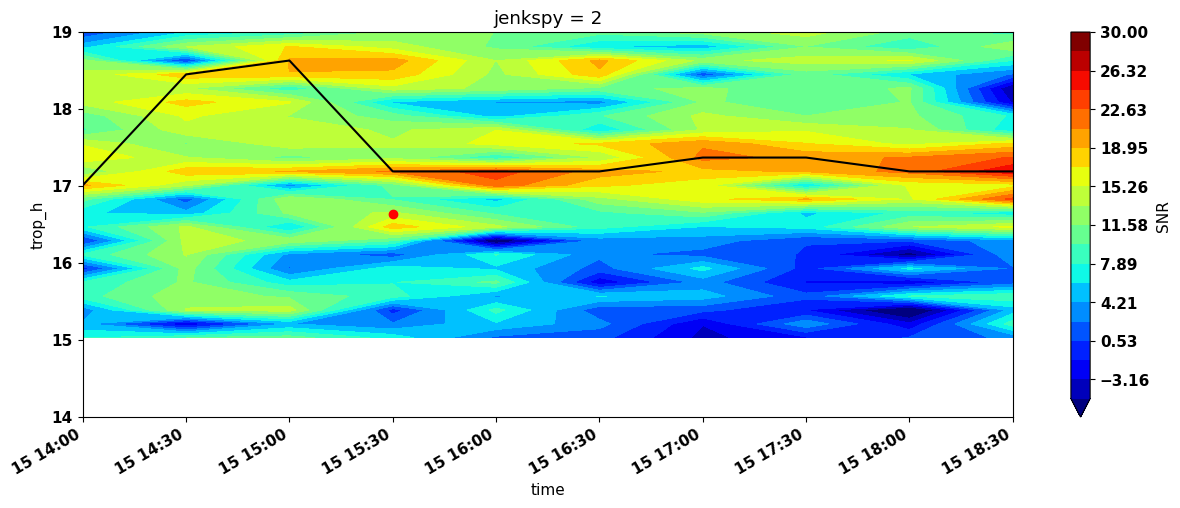

In [119]:
# rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(cpt_time[i])).resample(time='30Min').mean()
# sg =np.gradient(rs,axis=0)/np.gradient(rs.level.values*1000)
# h=rs.level.values
# snr_g=[]
# for j in range(len(sg)):
#     h_s = h[np.argmax(sg[j])]
#     snr_g.append(h_s)


# for i in range(len(cpt_time[:])):
#     rs = b.SNR.sel(beams= 1, level=slice(15, 19), time = str(cpt_time[i])).resample(time='30Min').mean()
#     sg =np.gradient(rs,axis=0)/np.gradient(rs.level.values*1000)
#     h=rs.level.values
# # print(rs.time)
# # print(sg[])
# # print(sg)
# # print(h)
  
#   # print(rs.time)       
#     y=jenk_trop(rs,1)
# # print(k_rs[0])

#     plt.rcParams['font.weight'] = 'bold'
#     plt.rcParams['font.size'] = 11
#     plt.figure(figsize=(15,5))
#     rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
#     r=(cpt_radiosonde1[i]/1000)

# # print(cpt_time[0])

#     plt.scatter(pd.Timestamp(cpt_time2[i]),r, color='red', marker='o', label='Specific Point')
# # plt.scatter(pd.Timestamp(cpt_time[1]),h_s, color='white', marker='o', label='Specific Point')

#     plt.ylim(14, 19)
# # y.trop_h.sel(jenkspy=1).plot(c='r')
#     y.trop_h.sel(jenkspy=2).plot(c='k')
#     Trop_jenkspy=y.trop_h.sel(jenkspy=2)
#     plt.plot(rs.time,snr_g[i])
# # print(Trop_jenkspy)
# # plt.axhline(y=r, color='g', linestyle='--', linewidth=2, label='Height Level 16632.8')
#     plt.xlabel('Time')
#     plt.ylabel('Height (Km)')

#     plt.title(cpt_time[i])
#     plt.tight_layout()
#     plt.savefig(f'/media/sps/My Passport/change_point detection/final_fig_30/jenkspy_{i}.jpg', dpi=100, bbox_inches='tight')

#     # Clear the current plot for the next iteration
#     plt.close()
# #     # plt.savefig('/media/sps/My Passport/change_point detection/final_fig/jenkspy+'i'+.jpg',dpi=500,bbox_inches='tight')

[17.19 16.29 17.73 16.83 16.47 16.47 17.01 17.01 17.01 17.91 16.83 17.37
 16.29 16.83 16.47 17.01 17.37 16.83 16.11 16.65]


<xarray.DataArray 'snr_g' ()>
array(17.19)

[15.57 15.57 15.57 15.57 15.57 15.75 16.29 16.29 16.47 15.75 15.75 15.75
 16.65 15.57 16.29 15.57 16.47 15.57 15.57 16.11]
6
16.29
16.1103
0.17970000000000041
<xarray.DataArray 'trop_h' ()>
array(15.93)
Coordinates:
    jenkspy  int64 3
    time     datetime64[ns] 2017-10-04T15:30:00
<xarray.DataArray 'trop_h' ()>
array(0.1803)
Coordinates:
    jenkspy  int64 3
    time     datetime64[ns] 2017-10-04T15:30:00


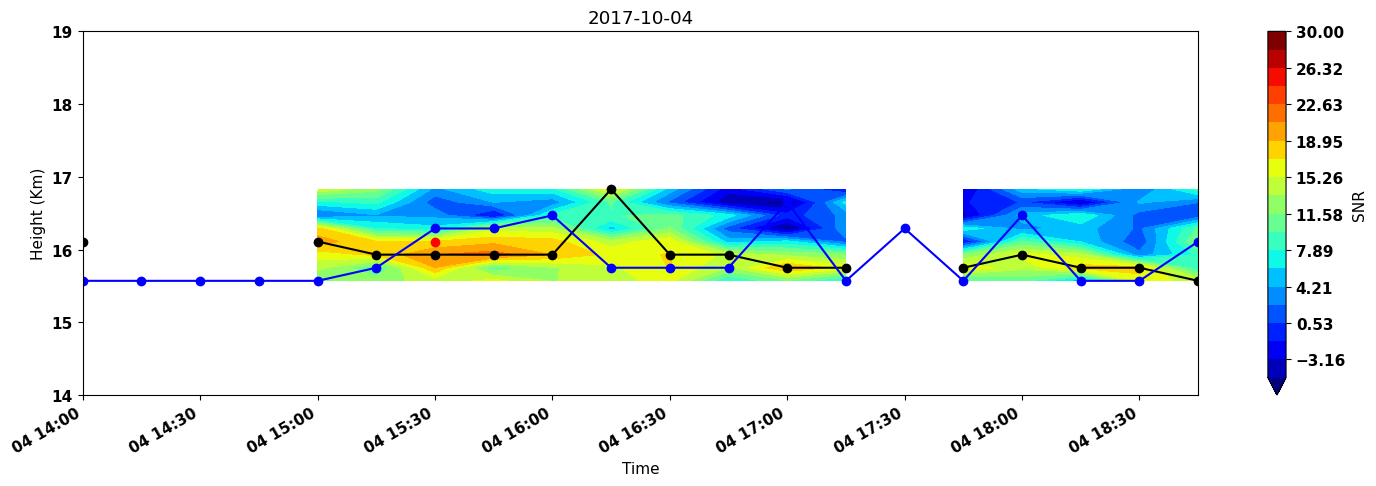

In [175]:

rs = b.SNR.sel(beams= 1, level=slice(15.5, 17), time = str(cpt_time[18])).resample(time='15Min').mean()
sg =np.gradient(rs,axis=0)/np.gradient(rs.level.values*1000)
h=rs.level.values
# print(rs.time)
# print(sg[])
# print(sg)
# print(h)
snr_g=[]
for i in range(len(sg)):
    h_s = h[np.argmax(sg[i])]
    snr_g.append(h_s)

snr_g_array = np.array(snr_g)
print(snr_g_array)
ds = xr.Dataset(data_vars={'snr_g': (('index',), snr_g_array)})
ds.to_netcdf("/media/sps/My Passport/change_point detection/jenkspy_data/snr18.nc")



# print(r)
    # print(h_s)
# print(rs.time)  
# print(cpt_time)
# print(cpt_time[9])
# print(snr_g)
y=jenk_trop(rs,2)
# print(k_rs[0])

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 11
plt.figure(figsize=(15,5))
rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
r=(cpt_radiosonde1[18]/1000)
# print(r)
# print(cpt_time2[:])

plt.scatter(pd.Timestamp(cpt_time2[18]),r, color='red', marker='o', label='Specific Point')
# plt.scatter(pd.Timestamp(cpt_time[1]),h_s, color='white', marker='o', label='Specific Point')

plt.ylim(14, 19)
# y.trop_h.sel(jenkspy=1).plot(c='r')
# y.trop_h.sel(jenkspy=2).plot(c='k')

# pd.Timestamp(array1[0])
rstime=pd.to_datetime(rs.time)

nearest_index = np.argmin(np.abs(rstime-(cpt_time2[18])))
print(nearest_index)
print(snr_g[nearest_index])
print(r)
print(np.abs(r-snr_g[nearest_index]))

Trop_jenkspy=y.trop_h.sel(jenkspy=3)

print(Trop_jenkspy[nearest_index])
print(np.abs(r-Trop_jenkspy[nearest_index]))
plt.plot(rs.time,Trop_jenkspy,color='k', marker='o')
plt.plot(rs.time,snr_g,color='b', marker='o')
# print(Trop_jenkspy)
# snr_g.to_netcdf("/media/sps/My Passport/change_point detection/jenkspy_data/snr0.nc")
Trop_jenkspy.to_netcdf("/media/sps/My Passport/change_point detection/jenkspy_data/jenkspy18.nc")
# print(Trop_jenkspy)
# plt.axhline(y=r, color='g', linestyle='--', linewidth=2, label='Height Level 16632.8')
plt.xlabel('Time')
plt.ylabel('Height (Km)')

plt.title(cpt_time[18])
plt.tight_layout()
plt.savefig(f'/media/sps/My Passport/change_point detection/final_fig_optimized/jenkspy18.jpg', dpi=100, bbox_inches='tight')

    # Clear the current plot for the next iteration
# plt.close()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

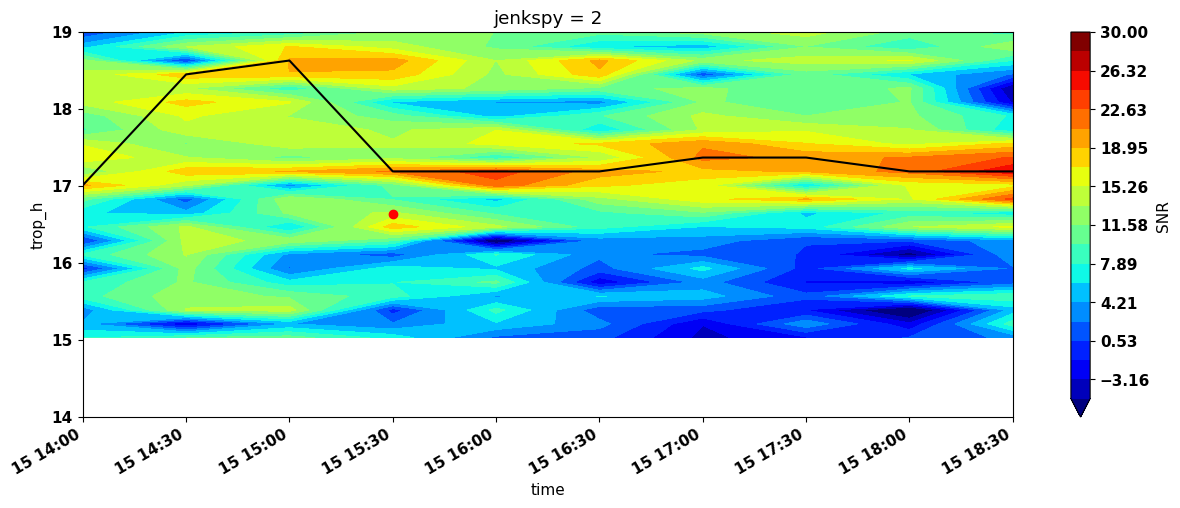

In [118]:
for i in range(len(cpt_time[:])):
    rs = b.SNR.sel(beams=1, level=slice(15, 19), time=str(cpt_time[i])).resample(time='30Min').mean()
    sg = np.gradient(rs, axis=0) / np.gradient(rs.level.values * 1000)
    h = rs.level.values

    # Extract specific height (h_s) using np.argmax and append it to snr_g list
    h_s = h[np.argmax(sg)]
    snr_g.append(h_s)

    # Perform Jenks natural breaks classification
    y = jenk_trop(rs, 1)

    # Create and save the plot
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.size'] = 11
    plt.figure(figsize=(15, 5))
    rs.plot.contourf(y='level', cmap='jet', vmax=30, vmin=-5, levels=20)
    r = (cpt_radiosonde1[i] / 1000)
    plt.scatter(pd.Timestamp(cpt_time2[i]), r, color='red', marker='o', label='Specific Point')
    plt.ylim(14, 19)
    y.trop_h.sel(jenkspy=2).plot(c='k')
    plt.plot(rs.time, snr_g[i])
    plt.xlabel('Time')
    plt.ylabel('Height (Km)')
    plt.title(cpt_time[i])
    plt.tight_layout()
    plt.savefig(f'/media/sps/My Passport/change_point detection/final_fig_30/jenkspy_{i}.jpg', dpi=100, bbox_inches='tight')
    plt.close()


In [ ]:
# import pandas as pd

B=[]
for i in k_rs[:]:
#     print (i)
    rs = b.SNR.sel(beams= 1, level=slice(16, 18.5), time = str(i)).resample(time='15Min').mean()
    y=jenk_trop(rs,3)
    B.append(y)
jn=xr.concat(B, dim='time')
jn

jn.trop_h.sel(jenkspy=3).plot(c='k')
# xr.to_dataframe(jn)
# jn.to_csv('/media/sps/My Passport/change_point detection/rdr_jenkspy_bpnt17-21')

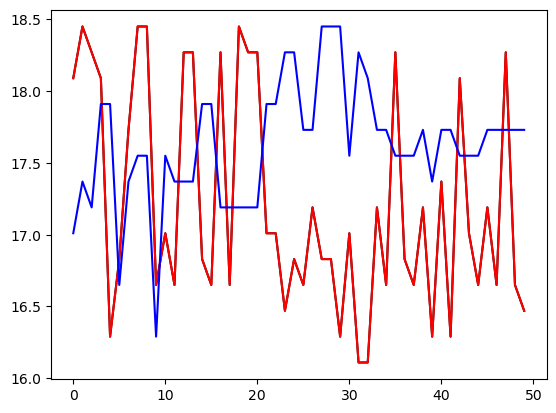

In [44]:
# print(jn)
jp1=jn.trop_h[2000:2050,1]
plt.plot(jp1,c='k')
jp2=jn.trop_h[2000:2050,2]
plt.plot(jp1,c='r')
jp3=jn.trop_h[2000:2050,3]
plt.plot(jp3,c='b')



0           NaN
1     86.956522
2     90.909091
3     86.956522
4     90.909091
5     86.956522
6     45.454545
7     86.956522
8     90.909091
9      0.000000
10     0.000000
11     0.000000
12   -43.478261
13     0.000000
14     0.000000
15     0.000000
16   -43.478261
17     0.000000
18     0.000000
19     0.000000
dtype: float64

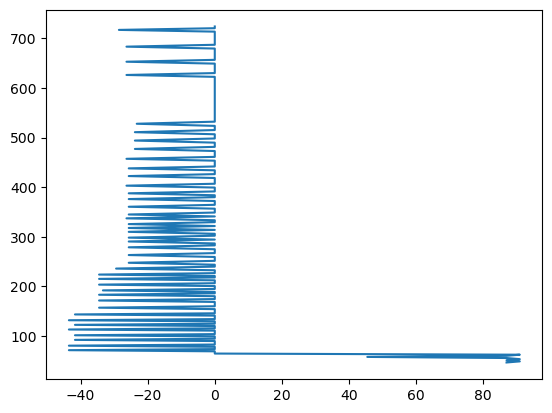

In [42]:
rds = pd.read_csv(rds2.iloc[ts.index(k_rs[10]),0], sep='\t',encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
rds.iloc[:,2].argmin(),rds.iloc[:,2].min(),rds.iloc[rds.iloc[:,2].argmin(),23]
LT=rds.iloc[:,2].diff()/(rds.iloc[:,23]/1000).diff()
plt.plot(LT[:200],rds.iloc[:200,23])
(rds.iloc[:20,2].diff()/(rds.iloc[:20,23]/1000).diff())

In [36]:
# def rptPELT_trop(rs, jp):
#     B = []

#     pelt = rpt.Pelt(jump = jp)

#     for i in range(len(rs.time)):
#         r=rs.isel(time=i, )
#         if np.isnan(r.values).all()==True:
#             print ('no values')
#             breaks = np.nan
#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"],[np.nan]*(bp+1) )}, 
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
#         else:
#             breaks = pelt.fit_predict(r.values, 30)

#             x = xr.Dataset(data_vars={"trop_h" : (["b_pnt"], r.level.isel(level=[j-1 for j in breaks]))}, 
#                            coords={'b_pnt':np.arange(bp+1)+1}).assign_coords(time=r.time.values)
        
#         B.append(x)
#     y=xr.concat(B, dim= 'time')
#     return y
# rpt

In [6]:
trph=[]
Y =[]
Lt = []
cp=pd.DataFrame(index = range(222),columns = range(3))
bp=2
jp=1
for i in range(len(k_rs[:])):
#     reading radiosonde file
    rds = pd.read_csv(rds2.iloc[ts.index(k_rs[i]),0], sep='\t',encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
#     finding files with height level > 17km
    if (rds.iloc[:,23].max()>17000):
        
        rs = b.SNR.sel(beams= 1, level=slice(16, 18), time = str(k_rs[i]))#.resample(time='1H').mean()
        # print (k_rs[i], str(pd.to_datetime(rs.time.values[0]).date()))
        
        tx = [str(j)[8:10]+' '+str(j)[11:16] for j in rs.time.values]
#         print (rs)
#         function to find RPT using change point method
        # y=BottumUp_trop(rs,2,jp)#
        y=jenk_trop(rs,2)
#         CPT values wriiten in cp
        cp.iloc[i,0] = k_rs[i]
        cp.iloc[i,1] = rds.iloc[rds.iloc[:,2].argmin(),23]
#         creating dataframe for time RPT and CPt values
        tr = pd.DataFrame(index=range(len(rs.time)), columns=range(4),)
        tr.iloc[:,0] = y.time.values     # all time in radar on a particular day
        # tr.iloc[:,1] = y.trop_h.sel(b_pnt=1).values # 
        y.trop_h.sel(jenkspy=3).values  #corresponding break point
        tr.iloc[:,2] = rds.iloc[rds.iloc[:,2].argmin(),23]    #CPT 
        tr.iloc[:,3] = rds.iloc[:,2].argmin()          #index point of CPT
        #time of radiosonde profile when it reaches tropopause
        lt = str(pd.to_datetime(laun.iloc[launt.index(k_rs[i]),0], 
                                      format = "%Y-%m-%d %H:%M:%S") + timedelta(
                                          seconds = rds.iloc[rds.iloc[:,2].argmin(),0]))
                                         
        trph.append(tr)
        Y.append(y)
        Lt.append(lt)
        
    
        # print (k_rs[i], str(pd.to_datetime(rs.time.values[0]).date()))
        # print (rds.columns[-1], rds[rds.columns[-1]].max(), rds[rds.columns[-1]].min())#rds['Altitude [m]'].max())
        # print (rds.columns[2])
        # rds.plot(x=2, y = rds.columns[-1])
    
#         f,ax = plt.subplots(figsize=(10,8))
#         rs.plot.contourf(y='level',  cmap='jet', vmax=30,vmin=-5,levels=20, ax=ax,)
#         ax.set(title=str(pd.to_datetime(rs.time[0].values).date()))
#         y.trop_h.sel(jenkspy=3).plot(c='k', ax=ax)
    #     print(tr.iloc[:,2])#rds.iloc[hh[i],23])
By=xr.concat(Y, dim='time')
tph = pd.concat(trph, axis = 0)
tph.index=np.arange(0,len(tph))
tph.rename(columns = {0:'RD_time', 1:'RPT',2:'CPT'}, inplace = True)
# tph.to_csv('/home/ahana/Documents/radiosonde_1s/rdr_bottumup_bpnt17-21', sep=',', index=False)
# with open(r'/home/ahana/Documents/radiosonde_1s/rdr_rds_t', 'w') as fp:
#     fp.write('\n'.join(Lt))

In [24]:
tph


,RD_time,RPT,CPT,3
0,2017-05-15 14:07:25,NaN,16632.8,4343
1,2017-05-15 14:15:44,NaN,16632.8,4343
2,2017-05-15 14:28:27,NaN,16632.8,4343
3,2017-05-15 14:36:46,NaN,16632.8,4343
4,2017-05-15 14:45:05,NaN,16632.8,4343
...,...,...,...,...
10440,2021-09-18 18:43:27,NaN,15746.6,3283
10441,2021-09-18 18:47:42,NaN,15746.6,3283
10442,2021-09-18 18:50:29,NaN,15746.6,3283
10443,2021-09-18 18:54:44,NaN,15746.6,3283


KeyError: 'b_pnt is not a valid dimension or coordinate'

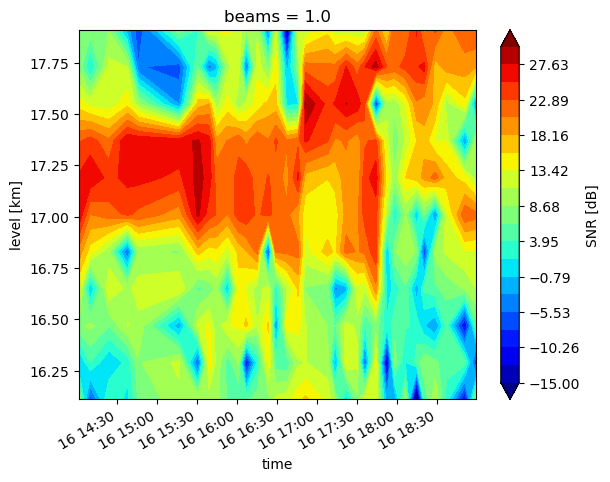

In [50]:
rs.plot.contourf(y='level', cmap='jet', vmin=-15, vmax=30, levels=20)
y.trop_h.sel(b_pnt=1).plot(c='k')

# CPT and RPT corresponding to radiosonde time

In [169]:
# file=open('/home/ahana/Documents/radiosonde_1s/rdr_rds_t',"r")      #radiosonde trop reaching time for the same dates as radar data
# cont=file.read()
# Lt=cont.split('\n')
# tph = pd.read_csv('/home/ahana/Documents/radiosonde_1s/rdr_bottumup_bpnt17-21', sep=',',parse_dates=True)#.apply(pd.to_numeric,)# errors = 'coerce')


# tt=[pd.to_datetime(i, format = "%Y-%m-%d %H:%M:%S") for i in Lt[:]]
# # finding the time in radar data nearest to CPT
# res = [min(pd.to_datetime(tph.iloc[:,0]), key=lambda sub: abs(sub - tt[j])) for j in range(len(Lt))]
# ct= pd.DataFrame(index=range(len(res)), columns= range(4))
# ct.rename(columns = {0:'RD_time', 1:'RPT',2:'CPT'}, inplace = True)
# for k in range(len(res)):
#     tm = tph.loc[tph['RD_time'] == str(res[k])].index.item()
#     ct.iloc[k,:] = tph.iloc[tm,:]
# ct.iloc[:,:].to_csv('/home/ahana/Documents/radiosonde_1s/sujith/rdr_bottumup_trop_2017-21', sep=',', index=False)
# ct

,RD_time,RPT,CPT,3
0,2017-05-15 15:35:01,16.65,16632.8,4343
1,2017-05-16 15:16:22,17.01,16711.6,4250
2,2017-05-29 15:18:48,17.37,17731.3,4553
3,2017-05-31 15:37:24,18.09,16851.5,3936
4,2017-06-03 15:20:34,17.01,17259.4,4730
...,...,...,...,...
207,2021-09-09 15:29:20,16.65,16098.2,3397
208,2021-09-11 15:56:49,17.37,16652.9,3028
209,2021-09-13 15:57:39,16.29,16381.0,3270
210,2021-09-16 15:39:59,16.29,16965.7,3412


In [110]:
ct.iloc[:,:].to_csv('/home/ahana/Documents/radiosonde_1s/rdr_jenkspy_trop_2017-21_final', sep=',', index=False)


LinregressResult(slope=0.15190125016219513, intercept=14.28116014037513, rvalue=0.1742145596924005, pvalue=0.011244880604002682, stderr=0.059389695521686284, intercept_stderr=1.0307192316350522)

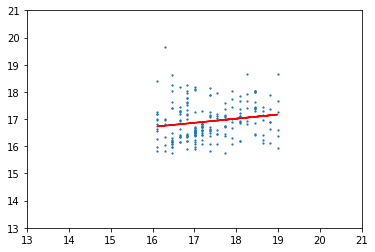

In [121]:
from scipy.stats import linregress

# ct.iloc[:,:3].to_csv('/home/ahana/Documents/radiosonde_1s/rdr_bpnt_trop_2017-21', sep=',', index=False)
ct=ct.dropna(how='any')
plt.scatter(ct.iloc[:,1], ct.iloc[:,2]/1000, s=1.5)
plt.xlim(13,21)
plt.ylim(13,21)
x=ct.iloc[:,1].values.astype(float)
y=(ct.iloc[:,2].values/1000).astype(float)
reg = linregress(x, y )
plt.plot(x, reg.intercept + reg.slope*x, 'r', label='fitted line')
reg

In [117]:
ct=ct.dropna(how='any')
ct.shape

(203, 4)

(44.0, 5143, 18018.0)

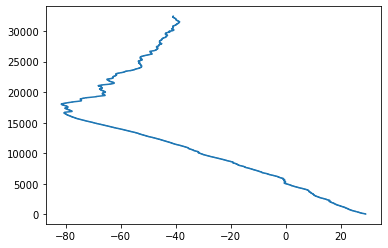

In [82]:
rds = pd.read_csv(rds2.iloc[ts.index(k_rs[8]),0], sep='\t',encoding ="ISO-8859-1").apply(pd.to_numeric, errors = 'coerce')
plt.plot(rds.iloc[:,2], rds.iloc[:,23])
rds.iloc[:,23].min(),rds.iloc[:,2].argmin(),rds.iloc[5143,23]

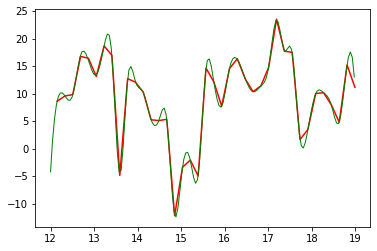

In [53]:
from scipy.interpolate import splrep, BSpline,UnivariateSpline
rs = b.SNR.sel(beams= 1, level=slice(12, 19), time = str(k_rs[15]))[0,:]
l2=np.arange(12,19,0.045)
# tck = splrep(np.arange(0,len(rs),1), rs, s=0)#len(rs.level))
spl = UnivariateSpline(rs.level, rs)
plt.plot(rs.level, rs,'r-')
# plt.plot(l2, BSpline(*tck)(l2), 'b--')
spl.set_smoothing_factor(0.5)
plt.plot(l2, spl(l2), 'g', lw=1)


In [ ]:
rs = b.SNR.sel(beams= 1, level=slice(16, 19), time = str(k_rs[1]))#.resample(time='15Min').mean()
y=jenk_trop(rs,2)
rs.plot.contourf(y='level', cmap='jet', vmax=30,vmin=-5,levels=20,)
# y.trop_h.sel(jenkspy=1).plot(c='k')
y.trop_h.sel(jenkspy=3).plot(c='k')
plt.title('jenkspy')